Imports

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

Dataset Loading from Local

In [ ]:
# Load Dataset from local Files

# Load IRIS
X_train_iris = np.load("iris_train_samples.npy")
Y_train_iris = np.load("iris_train_labels.npy")
X_val_iris = np.load("iris_val_samples.npy")
Y_val_iris = np.load("iris_val_labels.npy")


# Load MNIST
X_train_mnist = np.load("mnist_train_samples.npy")
Y_train_mnist = np.load("mnist_train_labels.npy")
X_val_mnist = np.load("mnist_val_samples.npy")
Y_val_mnist = np.load("mnist_val_labels.npy")




In [ ]:

def nsolve(X,y):
  a = np.linalg.inv(np.dot(X.T,X))
  w = np.dot(np.dot(a,X.T),y)
  return w


## 3A

In [ ]:
# Question 3-A

def lclass(exampleA, exampleB, testExamples):
    
    # -------- PROCESSING DATA --------


    # Creating the label matrix y
    # ExampleA is going to be label 0
    # ExampleB is going to be label 1
    # We are doing this to differentiate the classes
    y = []
    for _ in range(exampleA.shape[0]):
      y.append(0)
    for _ in range(exampleB.shape[0]):
      y.append(1)
    y = np.array(y)

    # Merging together exampleA and B to calculate theta
    X = np.concatenate((exampleA,exampleB))
    # Normalizing data between 0 and 1
    X = (X-np.min(X))/(np.max(X)-np.min(X))
    # Adding bias 1 in front of the X
    X = np.array([np.append(1,i) for i in X])

    # Normalizing data between 0 and 1
    valX = (testExamples-np.min(testExamples))/(np.max(testExamples)-np.min(testExamples))
    # Adding bias 1 in front of the valY
    valX = np.array([np.append(1,i) for i in valX])


    
    # -------- CALCULATION THETA --------

    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)


    # -------- PREDICTION --------

    # Prediction will receive values of 0 and 1
    # 0 means that values from testExamples are in exampleA
    # 1 means that values from testExamples are in exampleB
    prediction = (np.matmul(valX, theta) > 0.5).astype(np.int64)

    return prediction
    

## 3B

The next cell was taken from LAB 3 Classification as it was permitted on Moodle Forum in order to corrently represent the confusion matrix.

In [ ]:
def true_positive(Y_test, y_pred):
    mask = (Y_test == 1)
    
    tp = (Y_test[mask] == y_pred[mask]).sum()
    
    return tp.item()

def true_negative(Y_test, y_pred):
    mask = (Y_test == 0) | (Y_test == -1)
    
    tn = (Y_test[mask] == y_pred[mask]).sum()
    
    return tn.item()

def false_negative(Y_test, y_pred):
    mask = (y_pred == 0) | (y_pred == -1)
    
    tn = (Y_test[mask] != y_pred[mask]).sum()
    
    return tn.item()

def false_positive(Y_test, y_pred):
    mask = (y_pred == 1)
    
    tn = (Y_test[mask] != y_pred[mask]).sum()
    
    return tn.item()

def plot_confusion_matrix(Y_test, y_pred):
    
    tp = true_positive(Y_test, y_pred)
    tn = true_negative(Y_test, y_pred)
    fp = false_positive(Y_test, y_pred)
    fn = false_negative(Y_test, y_pred)
    
    cf = np.array([[tn, fn], [fp, tp]])
    
    fig, ax = plt.subplots()

    ax.matshow(cf, cmap=plt.cm.Blues)

    for i in range(2):
        for j in range(2):
            c = cf[j,i]
            ax.text(i, j, str(c), va='center', ha='center')

    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.show()


Question 3B


Validation set shape:  (15,)
Result shape:  (15,)
Result values: 
 [0 0 1 1 1 1 1 1 0 0 1 1 0 1 1]
Ground truth (Y_val_iris): 
 [0 0 2 2 1 2 2 1 0 0 2 2 0 2 1]
New Ground Truth with 0s and 1s only (read comments lines 39-43) 
 [0 0 1 1 1 1 1 1 0 0 1 1 0 1 1]



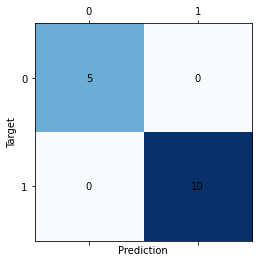

In [ ]:
# Question 3-B

# -------- SETTING UP THE DATA --------

# Create empty arrays
A = [] #exampleA
B = [] #exampleB

# Go through each label and split the data which has label 0 and anything else
# This is in order to test Setosa vs Non-Setosa
for i in range(Y_train_iris.shape[0]):
    if Y_train_iris[i] == 0:
      A.append(X_train_iris[i])
    else:
      B.append(X_train_iris[i])

# convert to Numpy arrays
exampleA = np.array(A)
exampleB = np.array(B)




# -------- TESTING 3B --------

# Testing with all IRIS samples
result = lclass(exampleA, exampleB, X_val_iris)

print("Validation set shape: ",Y_val_iris.shape)
print("Result shape: ",result.shape)
print("Result values: \n",result)
print("Ground truth (Y_val_iris): \n",Y_val_iris)



# -------- PLOTTING --------

# As the prediction outputs 0 and 1, 0 to confirm that the testExample is in
# the examplesA, and 1 to say that is not, I'm going to modify the ground truth
# (Y_val_iris) to show only 0s and 1s.
# This is because the ground truth hold 0s, 1s and 2s and the confusion matrix
# will show the many values ass wrong.


newValY = [] 

for i in range(Y_val_iris.shape[0]):
    if Y_val_iris[i] == 0:
      newValY.append(0)
    else:
      newValY.append(1)

newValY = np.array(newValY)
print("New Ground Truth with 0s and 1s only (read comments lines 39-43) \n",newValY)
print()


plot_confusion_matrix(newValY, result)



**Analysis**

In the results above I firstly present the shapes of the label Validation set and the output results from the lclass function. We can see that both have the same size which means the output coresponds correctly to the number of features in the validation set.

Next I present the actual output as 0s & 1s. The ground truth confirms that all Setosas labels (notes with 0 as a label) were correctly classfied. As describe in the task the 0 in the results stands for being part of the exampleA and 1 for not being part.

Due to how the actual labels are presented, I re-built the validation set to easily represent the confusion matrix. All Setosas were labeled as 0 as before and anything else (in our case the other 2 class) with 1.

In the end the confusion matrix (between the result and the new built validation set) confirms that 5 True Positives (5 Setosa classified correctly) were classified and 10 True Negatives (other classes which are not Setosa).

## 3C

In [ ]:
# Question 3-C
# examples - N-th examples / Features sets
# clas - vector of labels of the same size
# testExamples - test with this
# return - a matrix, where each row expresses the probability of a sample in 
#          testExamples to belong to each class


# Linear Multi-class classification using One-VS-Rest Method (More in 3D)
def lmclass(examples, clas, testExamples):
    
    # Used to know how many different classes of labels we have in the dataset
    unique, counts = np.unique(clas, return_counts=True)

    # to store multiple results later
    results = []
 
    # loop for each uniqu label. In IRIS we loop 3 times. For each iteration we
    # get the classification for:
    # Setosa vs (Versicolour,Virginica)
    # Versicolour vs (Setosa,Virginica)
    # Virginica vs (Setosa,Versicolour)
    for l in range(len(unique)):

      # -------- PROCESSING DATA --------
      a = [] # to be the first class to be classfied
      b = [] # to be the rest of classes which we classify against
      y = [] # used for the new revised labels 

      # loop for each label present in the dataset
      for i in range(clas.shape[0]):
        # if the label at i is the same as the current unique label we save in a
        # the features coresponding to this label and we also save a label 0 as
        # this is the main class vs label 1 the rest of classes.
        if clas[i] == unique[l]:
          a.append(examples[i])
          y.append(0)
        else:
          b.append(examples[i])
          y.append(1)

      # converting to numpy arrays
      exampleA = np.array(a)
      exampleB = np.array(b)
      y = np.array(y)

      
      # -------- PREDICTION --------
      # We predict using the equation from 3A
      prediction = multiClass(exampleA, exampleB, testExamples)
      # We append the vector of 0s and 1s into the results
      results.append(prediction)


    # After all iteration finished, we return the new matrix which contains all
    # the predictions for each classification.
    results = np.array(results)
    return results


## 3D

The function multiClass is a copy of the 3A but slightly modified to show as a probability. 

Next cells contain the task 3D.

In [ ]:
def multiClass(exampleA, exampleB, testExamples):
    y = []
    for _ in range(exampleA.shape[0]):
      y.append(0)
    for _ in range(exampleB.shape[0]):
      y.append(1)
    y = np.array(y)
    X = np.concatenate((exampleA,exampleB))
    X = (X-np.min(X))/(np.max(X)-np.min(X))
    X = np.array([np.append(1,i) for i in X])
    valX = (testExamples-np.min(testExamples))/(np.max(testExamples)-np.min(testExamples))
    valX = np.array([np.append(1,i) for i in valX])

    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    prediction = (np.matmul(valX, theta))
    # Everything above is as in 3A

    # From here is slightly modified

    # Normalizing the output to be between 0 and 1
    predNorm = (prediction-np.min(prediction))/(np.max(prediction)-np.min(prediction))
    # rounding to 2 decimals
    predRounded = (np.round(predNorm,decimals=2))

    return predRounded

Q-3D

Source: https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

After reserching multi-class classification I found that is not an easy solution due to its linearity and not being able to draw a straigh light thought 3 classes and properly devide them. By reading the article from Machine Learning Mastery, there are 2 solutions/methods which can solve the multi-class problem. 

One of these is One-VS-One which classifies a class vs another and later puts the results together.

The 2nd solution which I personally used is One-Vs-Rest which does the linear classification by using a class and putting the other classes together as the 2nd. I found this more useful as It shows clearly if a test is in the single class or somewhere in the rest of classes.

.

Now seeing the results.

In [ ]:
# Question 3-D

# -------- RESULTS --------
results = lmclass(X_train_iris,Y_train_iris,X_val_iris)

print("Ground truth (Y_val_iris): \n",Y_val_iris)

resultsBinary = (results > 0.5).astype(np.int64)
print("Binary Results: \n",resultsBinary)

print("Probabiliy Results: \n",results)
print("\n \n")


correlation = round(np.corrcoef(Y_val_iris,results)[0,1],2)
print("Correlation is: ",correlation)


Ground truth (Y_val_iris): 
 [0 0 2 2 1 2 2 1 0 0 2 2 0 2 1]
Binary Results: 
 [[0 0 1 1 1 1 1 1 0 0 1 1 0 1 1]
 [1 1 0 1 1 1 0 0 1 1 1 1 1 1 1]
 [1 1 0 0 1 0 0 1 1 1 0 0 1 0 1]]
Probabiliy Results: 
 [[ 0.13 -0.    1.46  1.05  0.89  0.96  1.26  0.91  0.2   0.18  1.    0.94
  -0.03  1.18  0.72]
 [ 0.78  0.88  0.28  0.72  0.55  0.66  0.26  0.47  0.58  0.65  0.75  0.77
   0.97  0.59  0.59]
 [ 1.09  1.12  0.26  0.23  0.56  0.38  0.48  0.62  1.22  1.18  0.25  0.28
   1.06  0.23  0.7 ]]

 

Correlation is:  0.94


In the output above we can the ground truth and next the binary representation of the results. In the binary representation Row 1 is for Setosa (label 0), row 2 for Versicolour (label 1) and row 3 for Virginica (label 2).

Were is a 0 in binary means it was correctly classified and where is a 1 means that was not (it was part of the "rest" dataset).

We can see that row 2, column 3 we have a 0 where it should be a 1, that is one missclassification so we are not 100% accurate. We can see this in the correlation which is 0.94.


Probability to be correctly classified is also shown in the "Probability results"